In [1]:
import pandas as pd
import plugin
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../../dataset/dataset-dynamic-static-joined.csv')

In [3]:
df, df_features, df_categories, types, families = plugin.pre_processing.pre_process(df=df)

Found the following types: 
	- Adware: 0
	- Ransomware: 1
	- Scareware: 2
	- benign: 3
Found the following families: 
	- 2015: 0
	- 2016: 1
	- 2017: 2
	- AndroidDefender: 3
	- AvForAndroid: 4
	- Charger: 5
	- Jisut: 6
	- Koler: 7
	- LockerPin: 8
	- Pletor: 9
	- PornDroid: 10
	- RansomBO: 11
	- Simplocker: 12
	- Svpeng: 13
	- Wannalocker: 14
	- android.spy.277: 15
	- avPass: 16
	- dowgin: 17
	- edwin: 18
	- fakeAV: 19
	- fakeApp: 20
	- fakeApp_AL: 21
	- fakeJobOffer: 22
	- faketaoBao: 23
	- feiwo: 24
	- gooligan: 25
	- kemoge: 26
	- koodous: 27
	- mobidash: 28
	- penetho: 29
	- selfmite: 30
	- shuanet: 31
	- virusShield: 32
	- youmi: 33


In [4]:
df.head()

,call_count_newfstatat,call_count_mmap,call_count_openat,call_count_prctl,call_count_mprotect,call_count_futex,call_count_write,call_count_pread64,call_count_getuid,call_count_writev,...,permission_com.keyideas.indianrailways.permission.C2D_MESSAGE,permission_com.unearby.sayhi.permission.C2D_MESSAGE,permission_com.unearby.sayhi.permission.MAPS_RECEIVE,permission_basic.guru.gforms.permission.C2D_MESSAGE,permission_com.minus.android.permission.C2D_MESSAGE,permission_uk.co.avoir.accord.permission.C2D_MESSAGE,permission_com.blackboard.mosaic.lousdk12caus.permission.C2D_MESSAGE,permission_com.im.urbancyclist.permission.C2D_MESSAGE,permission_com.im.urbancyclist.permission.UA_DATA,malicious
0,85.0,83,69.0,65,60.0,48.0,47.0,44.0,41.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,101.0,87,77.0,59,60.0,42.0,50.0,52.0,39.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,90.0,82,76.0,60,56.0,48.0,52.0,50.0,36.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,90.0,91,77.0,58,58.0,39.0,50.0,51.0,40.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,94.0,76,77.0,51,52.0,40.0,54.0,52.0,42.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
df_features.head()

,call_count_newfstatat,call_count_mmap,call_count_openat,call_count_prctl,call_count_mprotect,call_count_futex,call_count_write,call_count_pread64,call_count_getuid,call_count_writev,...,permission_com.accessbank.accessbankapp.permission.C2D_MESSAGE,permission_com.keyideas.indianrailways.permission.C2D_MESSAGE,permission_com.unearby.sayhi.permission.C2D_MESSAGE,permission_com.unearby.sayhi.permission.MAPS_RECEIVE,permission_basic.guru.gforms.permission.C2D_MESSAGE,permission_com.minus.android.permission.C2D_MESSAGE,permission_uk.co.avoir.accord.permission.C2D_MESSAGE,permission_com.blackboard.mosaic.lousdk12caus.permission.C2D_MESSAGE,permission_com.im.urbancyclist.permission.C2D_MESSAGE,permission_com.im.urbancyclist.permission.UA_DATA
0,85.0,83,69.0,65,60.0,48.0,47.0,44.0,41.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101.0,87,77.0,59,60.0,42.0,50.0,52.0,39.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90.0,82,76.0,60,56.0,48.0,52.0,50.0,36.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90.0,91,77.0,58,58.0,39.0,50.0,51.0,40.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,94.0,76,77.0,51,52.0,40.0,54.0,52.0,42.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_categories.head()

,malicious,type,family
0,0,3,1
1,0,3,0
2,0,3,1
3,0,3,0
4,0,3,2


In [7]:
categorization_columns = df_categories.columns.tolist()
categorization_columns

['malicious', 'type', 'family']

In [8]:
random_state = 1337

In [9]:
# Split dataset
train, test = train_test_split(df, test_size=0.2, random_state=random_state)

# Training
X_train = train.drop(categorization_columns, axis=1)
y_train = train[categorization_columns[0]]


# Testing
X_test = test.drop(categorization_columns, axis=1)
y_test = test[categorization_columns[0]]

In [10]:
tree_param = {
    'criterion':['gini','entropy'],
    'max_depth':[1,3,6,9,12,15,18],
    'min_samples_split':[20,30,40,50,60,70,80,90,100],
    'min_samples_leaf':[5,6,7,8,9,10],
}
grid = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 6, 9, 12, 15, 18],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [20, 30, 40, 50, 60, 70, 80, 90,
                                               100]})

In [11]:
grid.best_score_

0.8976958525345623

In [12]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 90}

In [13]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=90)

In [14]:
from sklearn.metrics import classification_report

tree = grid.best_estimator_

tree.fit(X_train, y_train)

abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=random_state, estimator=tree)
model = abc.fit(X_train, y_train)

In [15]:
y_prediction = model.predict(X_test)
report = classification_report(y_test, y_prediction, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.966387,0.995671,0.980810,231.000000
1,0.970588,0.804878,0.880000,41.000000
accuracy,0.966912,0.966912,0.966912,0.966912
macro avg,0.968487,0.900275,0.930405,272.000000
weighted avg,0.967020,0.966912,0.965615,272.000000


In [16]:
df_report.to_csv('../../results/reports/decision-tree-report.csv')

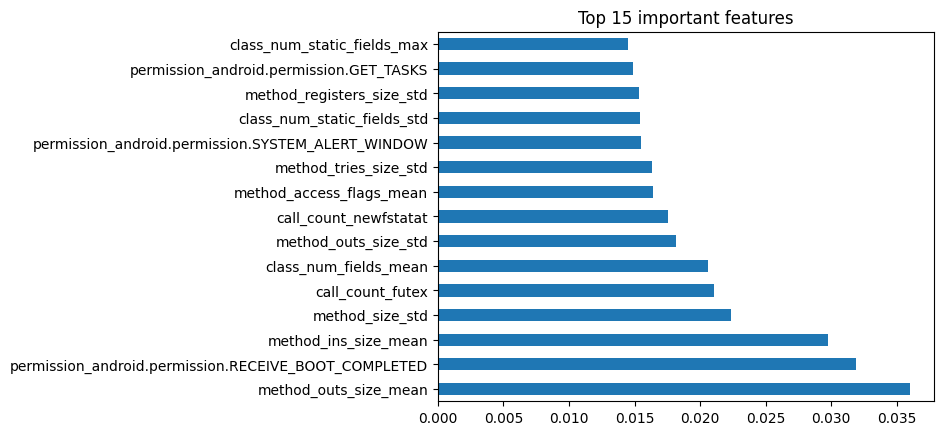

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

feat_importance = pd.Series(model.feature_importances_, index=df_features.columns)
feat_importance.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()


In [18]:
test_sample = y_test.value_counts()
test_sample

malicious
0    231
1     41
Name: count, dtype: int64

In [19]:
test_sample_dict = test_sample.to_dict()
"Percentage of malicious samples in the test dataset: " + str(round(100 * (test_sample_dict[1] / test_sample_dict[0]), 4)) + "%" 

'Percentage of malicious samples in the test dataset: 17.7489%'

In [20]:
import pickle

with open('../../results/models/decision-tree.pkl','wb') as f:
    pickle.dump(model, f)
